In [6]:
from scipy.io import loadmat
import ecg_plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model
import os


Duplicate key in file PosixPath('/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/matplotlibrc'), line 786 ('font.family : IPAexGothic')


In [7]:
def load_challenge_data(filename):
    x = loadmat(filename)
    data = np.asarray(x['val'], dtype=np.float64)
    new_file = filename.replace('.mat','.hea')
    input_header_file = os.path.join(new_file)
    with open(input_header_file,'r') as f:
        header_data=f.readlines()
    return data, header_data

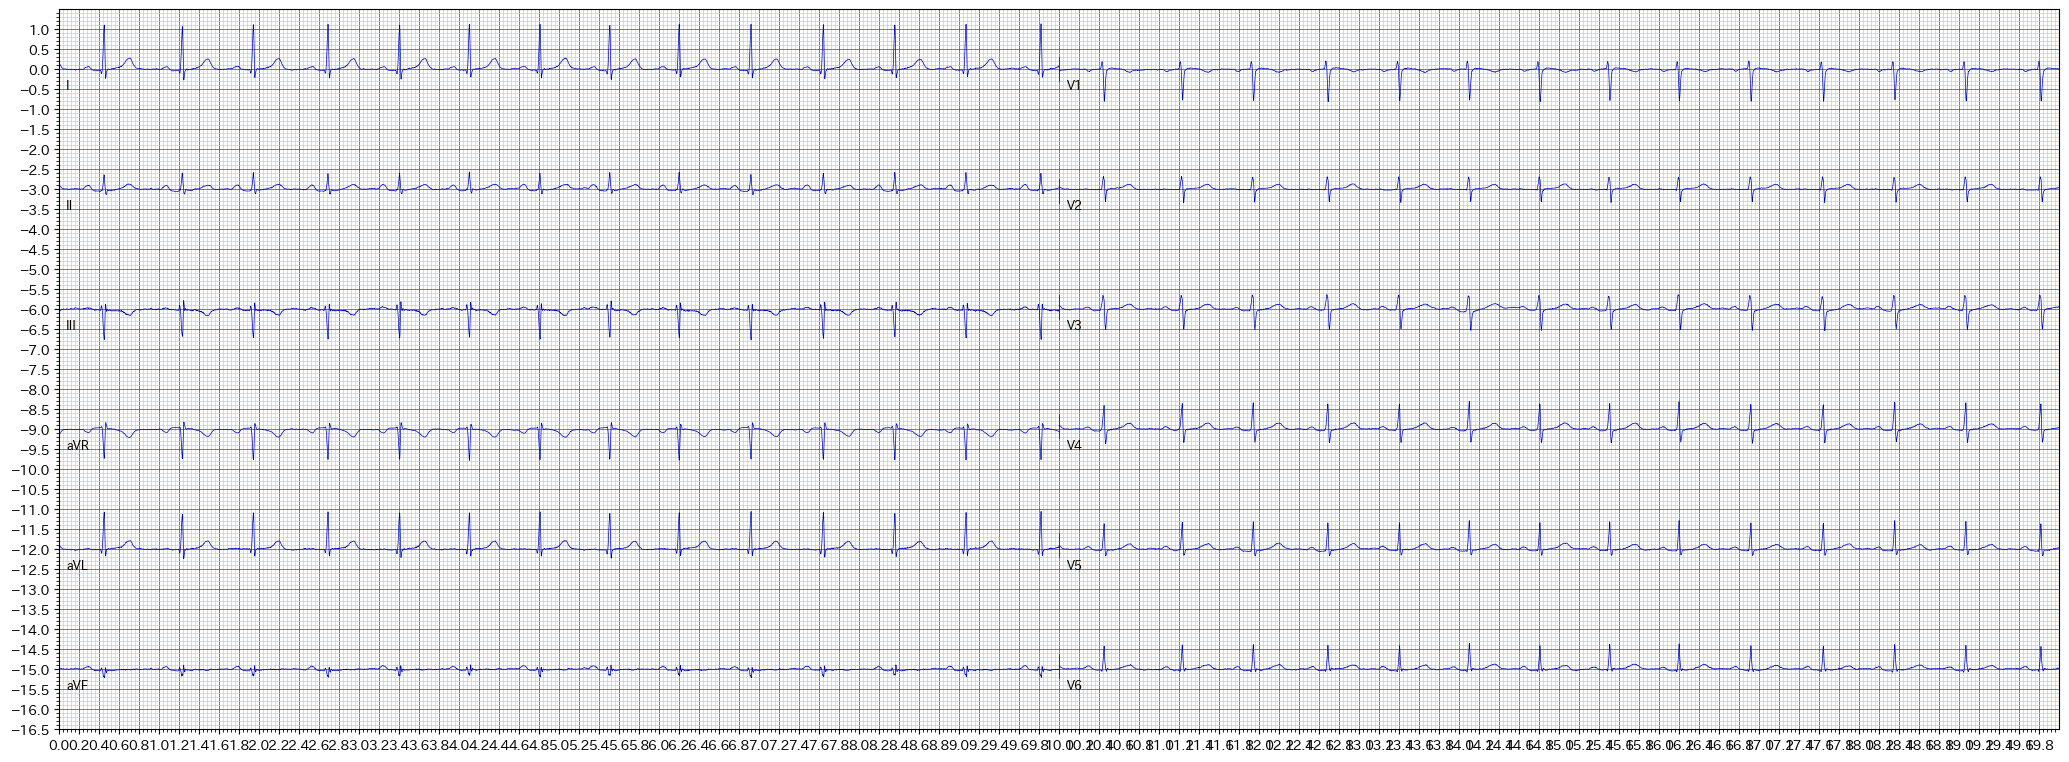

In [8]:
def plot_ecg(path):
    ecg_data = load_challenge_data(path)
    ecg_plot.plot(ecg_data[0]/1000, sample_rate=500, title='')
    ecg_plot.show()

plot_ecg("./src/georgia_database/WFDB/E00001.mat")

In [14]:
ecg_data,head = load_challenge_data("./src/georgia_database/WFDB/E00001.mat")

In [20]:
ecg_data[0].max()

1137.0

In [22]:
loadmat("./src/georgia_database/WFDB/E00001.mat")["val"]

array([[136, 136, 136, ...,  68,  73,  87],
       [ 87,  87,  87, ...,  34,  34,  34],
       [-48, -48, -48, ..., -34, -39, -53],
       ...,
       [ 97,  97,  97, ...,  48,  48,  53],
       [ 87,  87,  87, ...,  34,  34,  43],
       [ 78,  78,  78, ...,  29,  29,  29]], dtype=int16)

In [20]:
# sphのデータをload
# https://www.nature.com/articles/s41597-022-01403-5#Sec8
import h5py
h5_path = "./src/sph/records/A00001.h5"
with h5py.File(h5_path,'r') as f:
    print('(1)----- 1st level -----')
    # ファイルオブジェクトをイテレートするとファイル直下のオブジェクト名を返す
    for k in f:
        print(k)

    print('(2)----- 2nd level, Group "ecg" -----')
    # Groupもそのままforループに渡すと直下にいるオブジェクト名を返す
    for k in f['ecg']:
        print(k)
        print(type(k))
    '''
    print('(3)----- 2nd level, Group "entry1", keys() -----')
    # ディクショナリーのkeyを表示するようにしても(2)と同じ結果になる
    for k in f['entry1'].keys():
        print(k)

    print('(4)----- 2nd level, Group "entry1", values() -----')
    # entry1に入っている実体を表示
    for k in f['entry1'].values():
        print(k)

    print('(5)----- 2nd level, Group "entry1", items() -----')
    # entry1に入っているオブジェクト名と実体のtupleを表示
    for k in f['entry1'].items():
        print(k)

    print('(6)----- 3rd level, Group "data1", items() -----')
    # entry1/data1というGroupのオブジェクト名と実体のtuple
    for k in f['entry1/data1'].items():
        print(k)

    print('(7)----- 3rd level, Dataset "comment" -----')
    # commentはDatasetなので直下にオブジェクトを持たずkeysは使えない
    for k in f['entry1/comment'].keys():
        print(k)
    '''

(1)----- 1st level -----
ecg
(2)----- 2nd level, Group "ecg" -----
[0.0216 0.0216 0.0208 ... 0.0576 0.0552 0.0504]
<class 'numpy.ndarray'>
[0.1304 0.132  0.132  ... 0.0376 0.0384 0.0352]
<class 'numpy.ndarray'>
[ 0.1088  0.1096  0.1112 ... -0.02   -0.016  -0.0144]
<class 'numpy.ndarray'>
[-0.076  -0.0768 -0.0768 ... -0.0472 -0.0472 -0.0424]
<class 'numpy.ndarray'>
[-0.0432 -0.044  -0.0448 ...  0.0384  0.0352  0.032 ]
<class 'numpy.ndarray'>
[0.12   0.1208 0.1216 ... 0.0088 0.0112 0.0096]
<class 'numpy.ndarray'>
[-0.0112 -0.012  -0.0112 ...  0.0032 -0.0072 -0.0176]
<class 'numpy.ndarray'>
[-0.0064 -0.0104 -0.0136 ...  0.0056 -0.008  -0.02  ]
<class 'numpy.ndarray'>
[-0.0352 -0.0336 -0.0312 ... -0.0272 -0.036  -0.044 ]
<class 'numpy.ndarray'>
[-0.0544 -0.0544 -0.0528 ... -0.0248 -0.0288 -0.0344]
<class 'numpy.ndarray'>
[-0.0376 -0.0368 -0.0368 ... -0.0216 -0.0216 -0.024 ]
<class 'numpy.ndarray'>
[-0.0624 -0.0624 -0.0624 ...  0.      0.0008  0.0008]
<class 'numpy.ndarray'>
